## Zadanie: Implementacja i Trenowanie VAE na zbiorze FASHION MNIST

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, backend as K
import pandas as pd 

data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
X = data.iloc[:, 1:].values.reshape(-1, 28, 28) / 255  # Wszystkie kolumny poza pierwszą to dane pikseli 
y = data['label'].values   # Pierwsza kolumna to etykiety


2024-03-02 20:13:28.340809: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 20:13:28.340939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 20:13:28.496336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


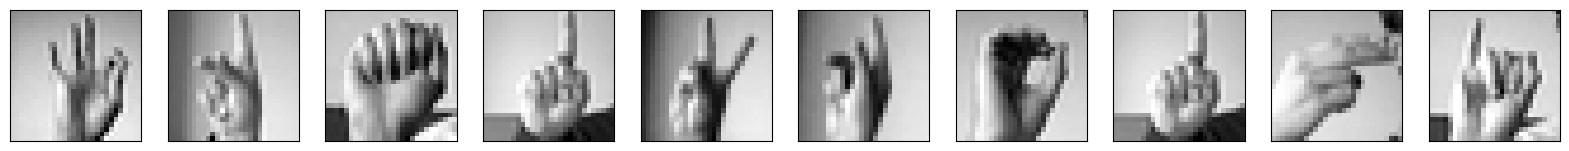

In [2]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(X[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Zadanie: Implementacja i Trenowanie VAE na zbiorze SIGN Language MNIST
Cel:

Celem zadania jest zaimplementowanie i przeszkolenie Variational Autoencoder (VAE) na zbiorze danych  SIGN Language MNIST. Zadanie to pozwoli na zrozumienie podstawowych mechanizmów stojących za autoenkoderami wariacyjnymi oraz ich zastosowanie w generowaniu nowych, realistycznych obrazów mody.
Zadania szczegółowe:

### Przygotowanie Danych:
        1. Wczytaj zbiór danych SIGN Language MNIST korzystając z dostępnych bibliotek, takich jak TensorFlow.

### Implementacja VAE:
        1. Zaimplementuj architekturę VAE, która zawiera enkoder, dekoder oraz mechanizm reparametryzacji.
        2. Enkoder powinien mapować obrazy wejściowe na rozkład prawdopodobieństwa w przestrzeni latentnej.
        3. Dekoder powinien odtwarzać obrazy z próbek pobranych z przestrzeni latentnej.

### Trenowanie Modelu:
        1. Przetrenuj model na zbiorze. 
        2. Eksperymentuj z różnymi rozmiarami przestrzeni latentnej, szybkościami uczenia się i rozmiarami partii, aby znaleźć optymalne ustawienia.

### Ewaluacja i Wizualizacja:
        Po przeszkoleniu modelu użyj dekodera do generowania nowych obrazów z próbek pobranych z przestrzeni latentnej.
        Wizualizuj oryginalne obrazy testowe i ich odtworzenia, aby ocenić jakość rekonstrukcji.
        Wizualizuj próbki z przestrzeni latentnej w formie obrazów, aby zobaczyć, jakie cechy zostały nauczone przez model.

### Kryteria Oceny:

    Poprawność implementacji VAE, w tym enkodera, dekodera.
    Jakość rekonstrukcji obrazów oraz interesujące cechy wygenerowane przez model w przestrzeni latentnej.
    Kreatywność w eksploracji różnych konfiguracji modelu i interpretacji wyników.

### Dodatkowe Wskazówki:

    Zaczynając, warto skorzystać z prostych architektur sieci neuronowych, takich jak sieci w pełni połączone lub proste sieci konwolucyjne.
    Dokładnie dokumentuj wszelkie eksperymenty i obserwacje, aby móc wyciągać wnioski i dostosowywać podejście.
    Korzystając z bibliotek takich jak TensorFlow, można znaleźć wiele przykładowych implementacji VAE, które mogą posłużyć jako punkt wyjścia.

In [3]:
mnist_images = X

In [4]:
mnist_images.max()

1.0

In [5]:
latent_dim = 2  # Wymiar przestrzeni ukrytej

encoder_inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
   z_mean, z_log_var = args
   batch = K.shape(z_mean)[0]
   dim = K.int_shape(z_mean)[1]
   epsilon = K.random_normal(shape=(batch, dim))
   return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 128) │     73,856 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 6272)      │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    802,944 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 2)         │          0 │ dense_1[0][0],    │
│                     │                   │            │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 877,956 (3.35 MB)

 Trainable params: 877,956 (3.35 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 128, activation='relu')(latent_inputs)
x = layers.Reshape((7, 7, 128))(x)
x = layers.Conv2DTranspose(128, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

decoder = Model(latent_inputs, decoder_outputs, name='decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6272)           │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 14, 14, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │           577 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,769 (940.50 KB)

 Trainable params: 240,769 (940.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
class VAE(Model):
   def __init__(self, encoder, decoder, **kwargs):
       super(VAE, self).__init__(**kwargs)
       self.encoder = encoder
       self.decoder = decoder

   def call(self, inputs):
       z_mean, z_log_var, z = self.encoder(inputs)
       reconstructed = self.decoder(z)
       kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
       self.add_loss(K.mean(kl_loss) / 784.0)
       return reconstructed

In [13]:
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss='mse')

vae.fit(mnist_images, mnist_images, epochs=1000, batch_size=64)

Epoch 1/1000
 16/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0476

I0000 00:00:1709410464.931156     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709410464.949585     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1709410464.952387     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0392
Epoch 2/1000
 18/113 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299

W0000 00:00:1709410468.730600     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0282
Epoch 3/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0255
Epoch 4/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236
Epoch 5/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0233
Epoch 6/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0231
Epoch 7/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0233
Epoch 8/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0232
Epoch 9/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229
Epoch 10/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0226
Epoch 11/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0226
Epoch 12/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224
Epoch 13/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0227
Epoch 14/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226
Epoch 15/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0223
Epoch 16/1000
113/113 ━━━━━━━━━━━━━━━━━━━

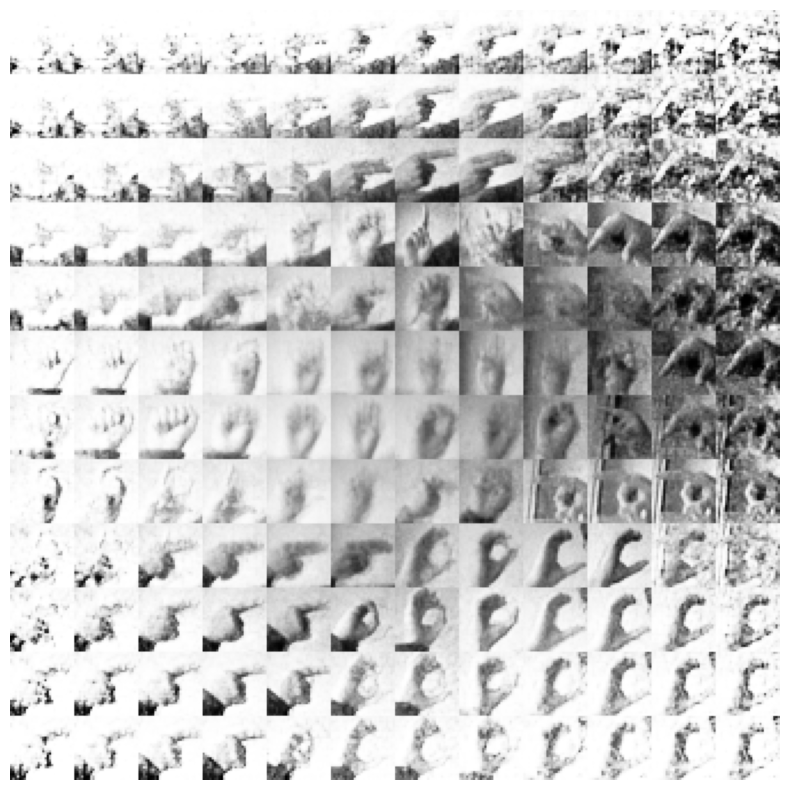

In [15]:
import matplotlib.pyplot as plt

n = 12  # Liczba cyfr do wygenerowania
figure = np.zeros((28 * n, 28 * n))
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
   for j, xi in enumerate(grid_y):
       z_sample = np.array([[xi, yi]])
       x_decoded = decoder.predict(z_sample, verbose=0)
       digit = x_decoded[0].reshape(28, 28)
       figure[i * 28: (i + 1) * 28,
              j * 28: (j + 1) * 28] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()

### Zadanie autoenkoder

**Zadanie: Oczyszczanie i Rekonstrukcja Obrazów za pomocą Autoenkodera**

**Cel zadania:**
Twoim zadaniem jest trenowanie autoenkodera w celu oczyszczenia i rekonstrukcji zaburzonych obrazów znaków migowych. Wykorzystasz zbiór danych zawierający obrazy oraz ich odpowiednie zaszumione wersje.

**Opis zadania:**

1. **Podział danych:** Podziel dane na zbiór treningowy i testowy, wykorzystując dostępne narzędzia takie jak `train_test_split`.

2. **Dodanie szumu:** Wygeneruj zaburzone wersje obrazów treningowych i testowych, dodając szum. W przykładzie użyto `x_train_noisy` i `x_test_noisy`.

3. **Model autoenkodera:** Zbuduj model autoenkodera w oparciu o Keras. Model powinien zawierać warstwy konwolucyjne do oczyszczania obrazów. Zadaniem modelu jest przewidzenie oryginalnych, niezaburzonych obrazów na podstawie ich zaburzonych wersji.

4. **Trening modelu:** Trenuj autoenkoder na danych treningowych (`x_train_noisy`) w celu nauczenia go oczyszczania obrazów. Skorzystaj z odpowiednich hiperparametrów, takich jak liczba epok, rozmiar batcha itp.

5. **Ewaluacja modelu:** Po treningu, oceniaj model na danych testowych (`x_test_noisy`) i oblicz jakość oczyszczania obrazów.

6. **Wizualizacja wyników:** Wykorzystaj model do rekonstrukcji obrazów i wyświetlenia oryginalnych i oczyszczonych wersji w celu oceny jakości modelu.

**Uwagi:**

- Ewaluacja modelu będzie polegać na porównaniu rekonstruowanych obrazów z ich oryginalnymi wersjami.
- Możesz dostosować kod i eksperymentować z architekturą autoenkodera oraz parametrami modelu, takimi jak funkcja straty i optymalizator, aby uzyskać najlepsze wyniki.
- Możesz także rozważyć inne techniki poprawy jakości obrazów, takie jak zastosowanie sieci generatywnych.

To zadanie koncentruje się na uczeniu maszynowym w kontekście przetwarzania obrazów, w szczególności na oczyszczaniu i rekonstrukcji obrazów za pomocą autoenkodera.

### Autoenkoder

In [16]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split


data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
X = data.iloc[:, 1:].values.reshape(-1, 28, 28) / 255  # Wszystkie kolumny poza pierwszą to dane pikseli 
y = data['label'].values   # Pierwsza kolumna to etykiety


x_train, x_test, _, _ = train_test_split(X, y, test_size=0.1, random_state=42)

noise_factor = 0.02
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



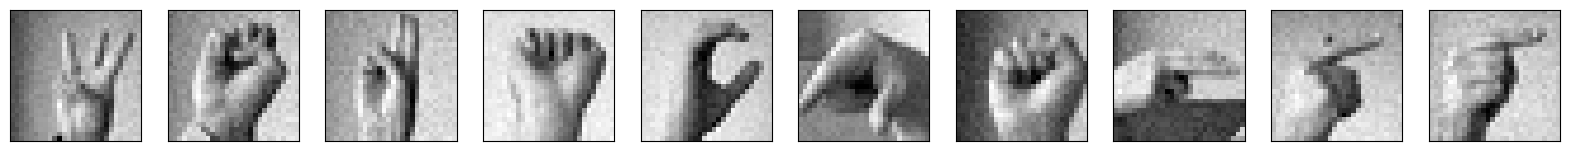

In [17]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
from keras.layers import Conv2D, MaxPooling2D, Conv2D, UpSampling2D
from keras import Input, Model

input_img = Input(shape=(28, 28, 1))

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,epochs=100,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test))

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.6472 - val_loss: 0.5995
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5953 - val_loss: 0.5921
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5874 - val_loss: 0.5882
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5861 - val_loss: 0.5869
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5849 - val_loss: 0.5857
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5820 - val_loss: 0.5849
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5829 - val_loss: 0.5848
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5822 - val_loss: 0.5838
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5823 - val_loss: 0.5849
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5832 - val_loss: 0.5829
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5810 - val_loss: 0.5830
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


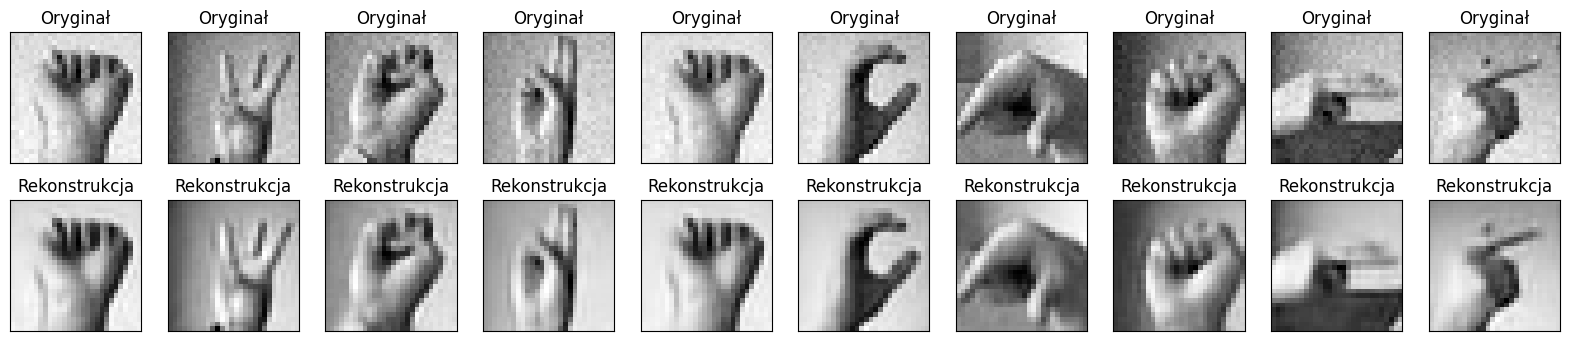

In [26]:
import matplotlib.pyplot as plt

# Odtworzenie obrazów z zestawu testowego
decoded_images = autoencoder.predict(x_test_noisy)

# Wybór kilku przykładów do wizualizacji
n = 10  # Wybierz liczbę przykładów do wyświetlenia
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obraz oryginalny
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("Oryginał")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rekonstrukcja
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.title("Rekonstrukcja")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
